**tf.keras.callbacks.EarlyStopping:**

EarlyStopping is a callback in TensorFlow/Keras that allows you to stop training when a monitored metric (like validation loss) has stopped improving. This is especially useful for preventing overfitting, saving time, and resources during training.




In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [53]:
x = tf.range(1.0,101.0,1)

In [54]:
y = 2 * x + 10

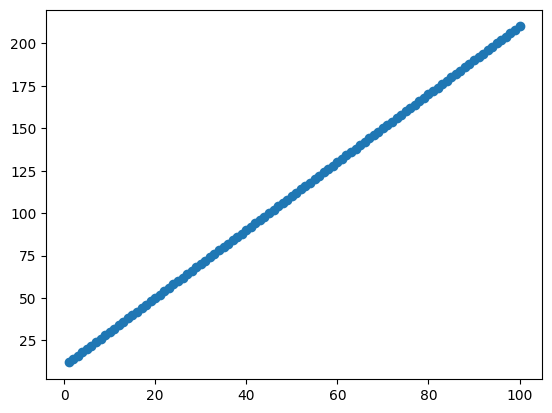

In [55]:
plt.scatter(x,y)

In [56]:
x_train = x[:90]
x_test = x[90:]
y_train = y[:90]
y_test = y[90:]

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(400, activation = None),
    tf.keras.layers.Dense(800, activation = None),
    tf.keras.layers.Dense(400, activation = None),
    tf.keras.layers.Dense(1, activation = None)
])

In [58]:
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01),
              metrics = ['mae'])

In [59]:
# Define the EarlyStopping callback

In [60]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 9,
    verbose = 1,
    restore_best_weights = True
)

**Key Parameters:**

**monitor:** The metric to monitor, such as 'val_loss' or 'val_accuracy'.

**min_delta:** The minimum change in the monitored metric to qualify as an improvement. If the change is less than min_delta, it’s not considered an improvement.

**patience:** The number of epochs with no improvement after which training will be stopped. This helps to avoid stopping too early if the model might improve after a few more epochs.

**mode:** Determines whether to look for the minimum or maximum value of the monitored metric. Use 'min' for loss metrics and 'max' for accuracy metrics.

**verbose:** If 1, it prints messages about when training is being stopped. If 0, it’s silent.

**restore_best_weights:** If True, it restores the model weights from the epoch with the best value of the monitored metric, ensuring that the best model is used.

In [61]:
model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), callbacks = [early_stopping_callback])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 101.5115 - mae: 101.5115 - val_loss: 195.3646 - val_mae: 195.3646
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 99.8720 - mae: 99.8720 - val_loss: 191.9305 - val_mae: 191.9305
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 98.1915 - mae: 98.1915 - val_loss: 188.4214 - val_mae: 188.4214
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 96.4744 - mae: 96.4744 - val_loss: 184.8275 - val_mae: 184.8275
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 94.7146 - mae: 94.7146 - val_loss: 181.1315 - val_mae: 181.1315
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 92.9031 - mae: 92.9031 - val_loss: 177.3107 - val_mae: 177.3107
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 91.0285 - mae: 91.0285 - val_loss: 173.3381 - val_mae: 173.3381
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 89.0770 - mae: 89.0770 - val_loss: 169.1813 - val_mae: 169.1813
Epoch 9/100
3/3 ━━━━━

In [63]:
y_pred = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [64]:
for i in range(len(x_test)):
    print(f"x_test: {x_test[i]}, y_test: {y_test[i]}, y_pred: {y_pred[i]}")

x_test: 91.0, y_test: 192.0, y_pred: [194.54599]
x_test: 92.0, y_test: 194.0, y_pred: [196.6744]
x_test: 93.0, y_test: 196.0, y_pred: [198.8028]
x_test: 94.0, y_test: 198.0, y_pred: [200.93118]
x_test: 95.0, y_test: 200.0, y_pred: [203.05956]
x_test: 96.0, y_test: 202.0, y_pred: [205.18797]
x_test: 97.0, y_test: 204.0, y_pred: [207.31638]
x_test: 98.0, y_test: 206.0, y_pred: [209.44476]
x_test: 99.0, y_test: 208.0, y_pred: [211.57315]
x_test: 100.0, y_test: 210.0, y_pred: [213.70155]


**Why Use EarlyStopping?**
1. **Avoid Overfitting:** If your model starts to overfit, meaning it
performs well on the training data but poorly on the validation data, EarlyStopping can stop the training before overfitting becomes significant.
2. **Save Time:** Training a model for too many epochs when it’s no longer improving is a waste of time and computational resources. EarlyStopping helps you avoid this.
3. **Resource Efficiency:** It optimizes the use of computational resources by stopping the training process once the model stops improving.